<a href="https://colab.research.google.com/github/Ahmadfikriand/R-and-Python-Code/blob/master/Women_Clothing_Reviews_Classification_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hubungkan dengan Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import library yang dibutuhkan**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

**Top 5 dataframe**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


**Memeriksa tipe data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


**Data Pre-Processing**

Feature Selection

In [5]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True) #remove unnecessary columns from data

Menghapus duplikat

In [6]:
#checking for duplicated entries
duplicates = df.duplicated().sum()
if  duplicates == 0:
    print("There are no duplicted rows in this data")
else:
    print('There are: ', str(duplicates), " duplicates")

There are:  21  duplicates


In [7]:
df=df.drop_duplicates()

Memeriksa null values

In [8]:
df["Review Text"].isnull().sum()

825

Menghapus null values tersebut

In [9]:
df.dropna(subset=['Review Text'], inplace= True)

In [10]:
df["Review Text"].isnull().sum()

0

In [11]:
df["Recommended IND"].isnull().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22640 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22640 non-null  int64 
 1   Age                      22640 non-null  int64 
 2   Title                    19675 non-null  object
 3   Review Text              22640 non-null  object
 4   Rating                   22640 non-null  int64 
 5   Recommended IND          22640 non-null  int64 
 6   Positive Feedback Count  22640 non-null  int64 
 7   Division Name            22627 non-null  object
 8   Department Name          22627 non-null  object
 9   Class Name               22627 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


**Exploratory Data Analysis**

In [13]:
df["Recommended IND"].value_counts()

1    18539
0     4101
Name: Recommended IND, dtype: int64

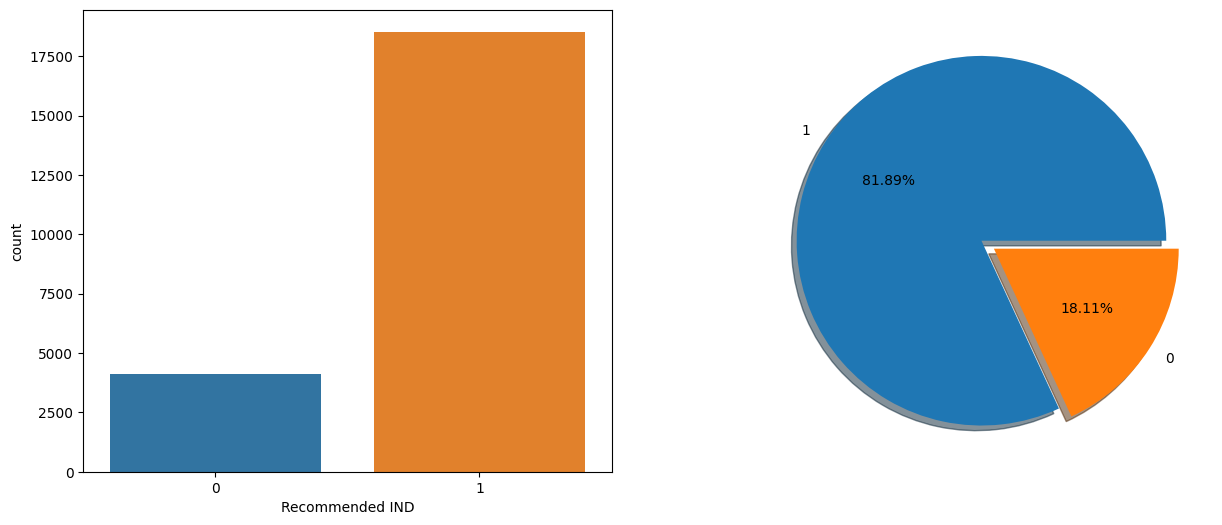

In [14]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = df['Recommended IND'], data = df)

plt.subplot(1, 2, 2)
plt.pie(x= df['Recommended IND'].value_counts(), labels = ("1","0"), explode = (0, 0.08), shadow = True, autopct = '%1.2f%%')

plt.show()

**Resampling**

In [15]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class
df_majority = df[(df['Recommended IND']==1)]
df_minority = df[(df['Recommended IND']==0)]

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples=15539 , # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [16]:
df_upsampled['Recommended IND'].value_counts

<bound method IndexOpsMixin.value_counts of 4926     0
21598    0
17773    0
2579     0
19705    0
        ..
23479    1
23481    1
23482    1
23484    1
23485    1
Name: Recommended IND, Length: 34078, dtype: int64>

**Setelah resampling**

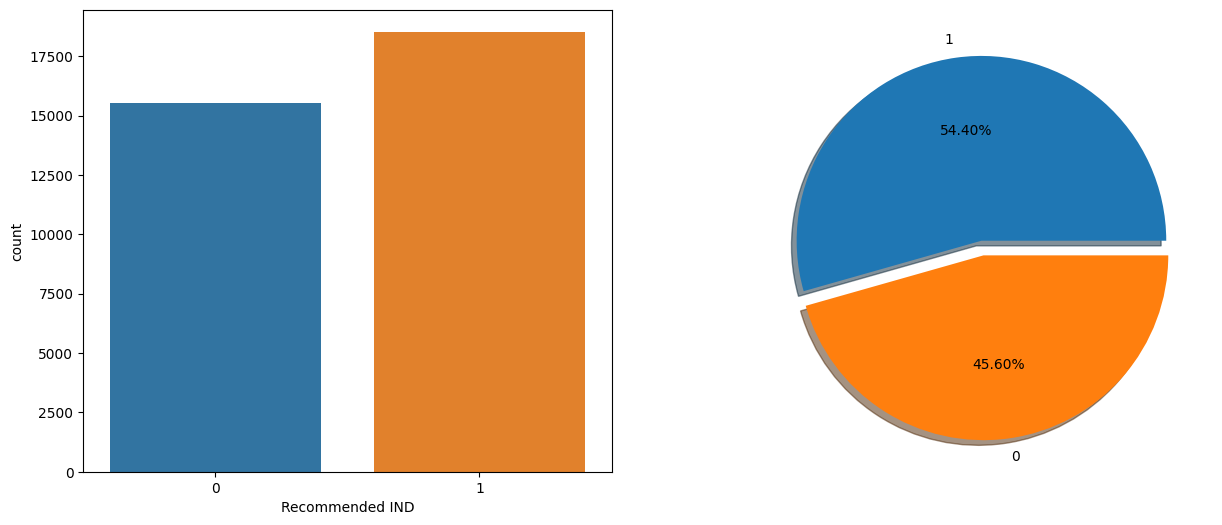

In [17]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = df_upsampled['Recommended IND'], data = df)

plt.subplot(1, 2, 2)
plt.pie(x= df_upsampled['Recommended IND'].value_counts(), labels = ("1","0"), explode = (0, 0.08), shadow = True, autopct = '%1.2f%%')

plt.show()

- 0 menandakan "produk yang tidak direkomendasikan", sedangkan 1 menandakan "produk yang direkomendasikan".
- Mayoritas toko lebih banyak menjual produk yang direkomendasikan.

In [18]:
df["Rating"].value_counts()

5    12539
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

<Axes: ylabel='Rating'>

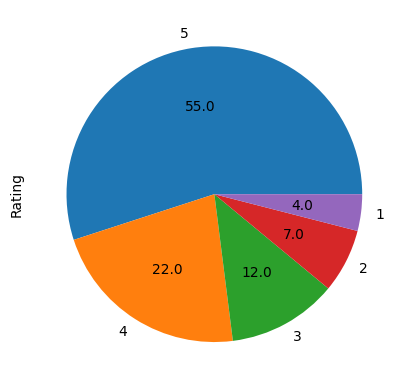

In [19]:
round(df['Rating'].value_counts()/df.shape[0]*100).plot.pie(autopct='%1.1f')

Grafik di atas menampilkan lebih dari 50% pelanggan memberikan rating "5" , 11% pelanggan kurang puas dan memberikan rating "1" dan "2".

In [20]:
df["Division Name"].value_counts()

General           13364
General Petite     7837
Initmates          1426
Name: Division Name, dtype: int64

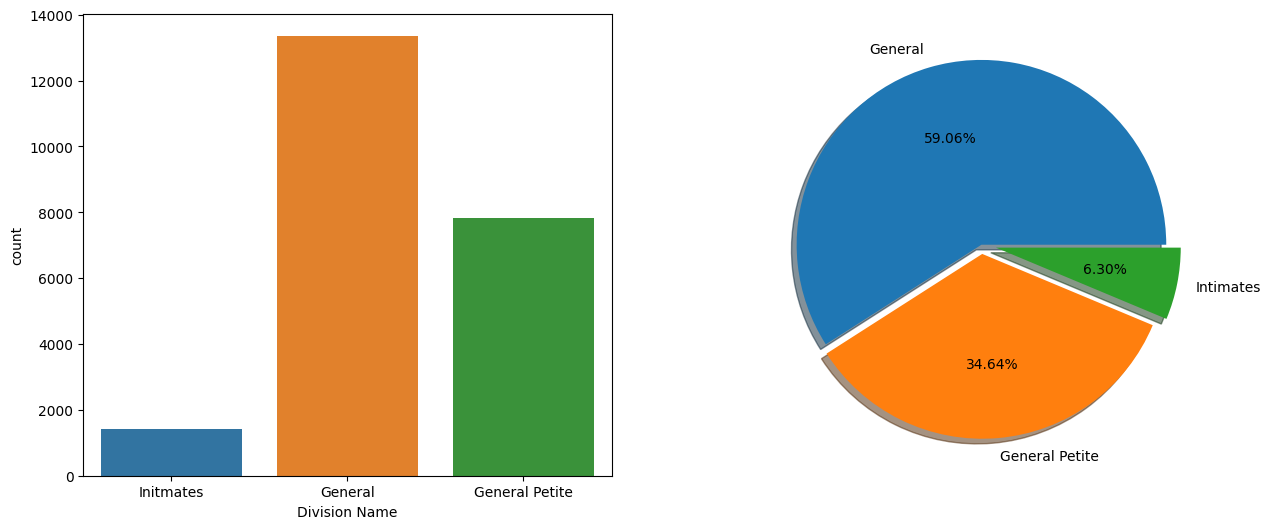

In [21]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = df['Division Name'], data = df)

plt.subplot(1, 2, 2)

plt.pie(x= df['Division Name'].value_counts(),labels=('General','General Petite',"Intimates") ,explode = (0, 0.05,0.08), shadow = True, autopct = '%1.2f%%')

plt.show()

In [22]:
df["Department Name"].value_counts()

Tops        10048
Dresses      6145
Bottoms      3661
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

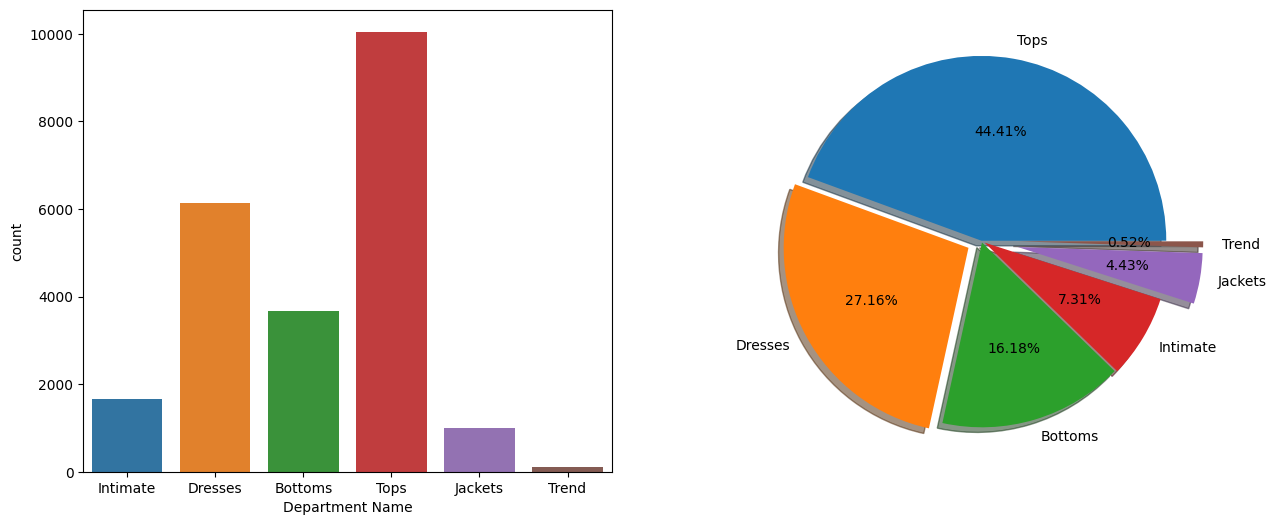

In [23]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = df['Department Name'], data = df)

plt.subplot(1, 2, 2)
plt.pie(x= df['Department Name'].value_counts(),labels=('Tops','Dresses',"Bottoms","Intimate","Jackets","Trend") ,explode = (0, 0.08, 0.01,0.02,0.2,0.2), shadow = True, autopct = '%1.2f%%')

plt.show()

Dari grafik di atas, dapat mengambil kesimpulan bahwa produk "Tops" merupakan yang paling banyak tersedia, sedangkan produk "Trendy" merupakan yang paling sedikit tersedia.

<ipython-input-24-ff1bb4ff98c0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']).set_title("Age Distribution")


Text(0.5, 1.0, 'Age Distribution')

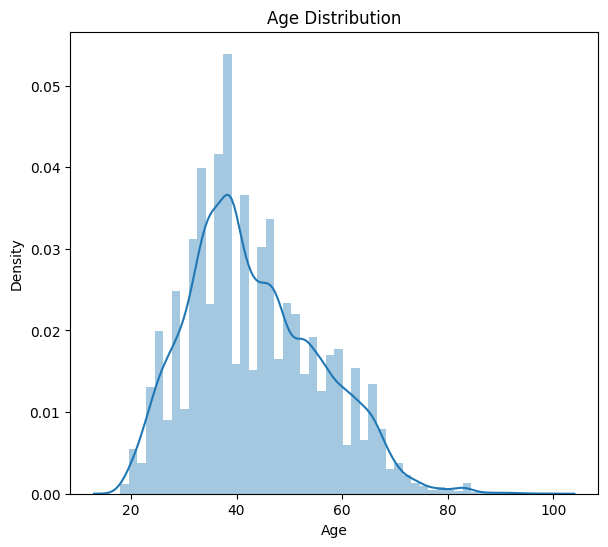

In [24]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title = ('Age_distribution')
sns.distplot(df['Age']).set_title("Age Distribution")

Mayoritas pelanggan berusia antara 30-50 tahun.

<ipython-input-25-df7ae4ea7db1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Positive Feedback Count']).set_title("Positive Feedback Count dist")


Text(0.5, 1.0, 'Positive Feedback Count dist')

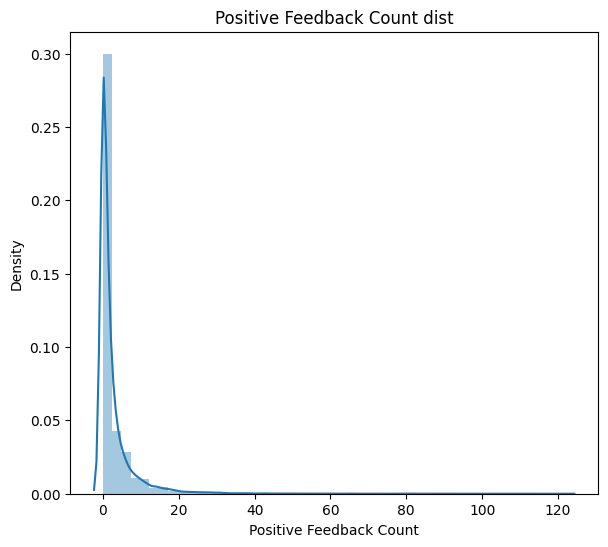

In [25]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title = ('Positive Feedback Count')
sns.distplot(df['Positive Feedback Count']).set_title("Positive Feedback Count dist")

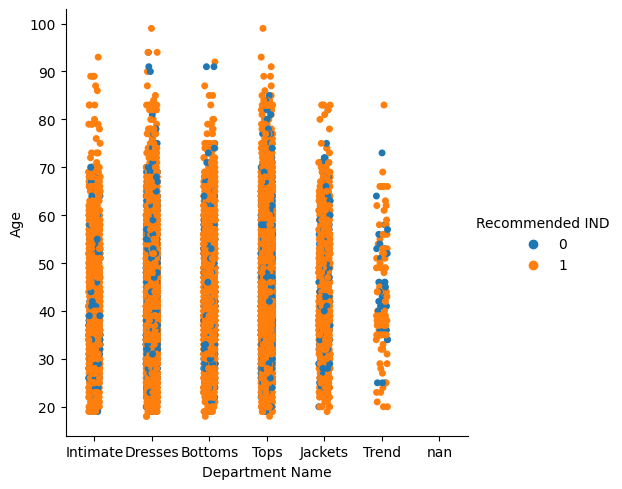

In [26]:
sns.catplot(x="Department Name", y="Age", hue="Recommended IND",data= df)

Terlihat jelas bahwa setiap departemen, mayoritas produk adalah yang direkomendasikan.

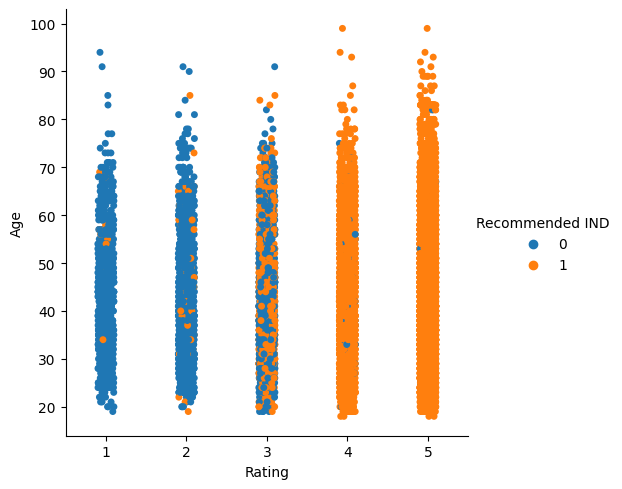

In [27]:
sns.catplot(x="Rating", y="Age", hue="Recommended IND",data= df)

Produk dengan rating 1 dan 2 kebanyakan bukan yang direkomendasikan, sedangkan rating 4 dan 5 adalah yang direkomendasikan.

In [28]:
df.drop([ "Clothing ID","Age","Title","Rating","Positive Feedback Count","Division Name","Department Name","Class Name"], axis = 1, inplace = True) #remove unnecessary columns from data

Dalam membuat model yang dapat mengklasifikasikan ulasan Positif dan Negatif, semua fitur yang tidak perlu telah dihilangkan. DataFrame yang tersedia hanya "Review Text" dan "Recommended Index".

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22640 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      22640 non-null  object
 1   Recommended IND  22640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [30]:
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [31]:
df["Review Text"].isnull().value_counts()

False    22640
Name: Review Text, dtype: int64

In [32]:
df["Recommended IND"].isnull().value_counts()

False    22640
Name: Recommended IND, dtype: int64

**Text Manipulation**

In [33]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

nltk.download('wordnet')
nltk.download("stopwords")
stop_words=stopwords.words("english")
new_stopping_words = stop_words[:len(stop_words)-36]
new_stopping_words.remove("not")
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Noise Removal (Punctuation)

In [34]:
def remove_punc(df):
    new_text= re.sub("n't",'not', df)
    new_text= re.sub('[^\w\s]','', df)
    return new_text

In [35]:
processed_text=remove_punc(str(df["Review Text"]))
processed_text

'0        Absolutely wonderful  silky and sexy and comf\n1        Love this dress  its sooo pretty  i happene\n2        I had such high hopes for this dress and reall\n3        I love love love this jumpsuit its fun fl\n4        This shirt is very flattering to all due to th\n                                                       \n23481    I was very happy to snag this dress at such a \n23482    It reminds me of maternity clothes soft stre\n23483    This fit well but the top was very see throug\n23484    I bought this dress for a wedding i have this \n23485    This dress in a lovely platinum is feminine an\nName Review Text Length 22640 dtype object'

Tokenization

In [36]:
def tokenizze(df):
    newdata= word_tokenize(df)
    return newdata

In [37]:
tokenized_data=tokenizze(processed_text.lower())
tokenized_data

['0',
 'absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 '1',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 '2',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 '3',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 '4',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 '23481',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 '23482',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 '23483',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 '23484',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 '23485',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'review',
 'text',
 'length',
 '22640',
 'dtype',
 'object']

Removing Number

In [38]:
def remove_num(df):
    text_without_num=[w for w in df if w.isalpha()]
    return text_without_num

In [39]:
textwithoutnum= remove_num(tokenized_data)
textwithoutnum

['absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'review',
 'text',
 'length',
 'dtype',
 'object']

Removing stop words

In [40]:
def remove_stops(df):
    newdata=[t for t in df if t not in new_stopping_words]
    return newdata

In [41]:
data=remove_stops(textwithoutnum)
data

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comf',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happene',
 'high',
 'hopes',
 'dress',
 'reall',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'fl',
 'shirt',
 'flattering',
 'due',
 'th',
 'happy',
 'snag',
 'dress',
 'reminds',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'fit',
 'well',
 'top',
 'see',
 'throug',
 'bought',
 'dress',
 'wedding',
 'dress',
 'lovely',
 'platinum',
 'feminine',
 'name',
 'review',
 'text',
 'length',
 'dtype',
 'object']

Lemmatization

In [42]:
def lemmatizze(df):
    newdata= [WordNetLemmatizer().lemmatize(t) for t in df]
    return newdata

In [43]:
final_data=lemmatizze(data)
final_data

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comf',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happene',
 'high',
 'hope',
 'dress',
 'reall',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'fl',
 'shirt',
 'flattering',
 'due',
 'th',
 'happy',
 'snag',
 'dress',
 'reminds',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'fit',
 'well',
 'top',
 'see',
 'throug',
 'bought',
 'dress',
 'wedding',
 'dress',
 'lovely',
 'platinum',
 'feminine',
 'name',
 'review',
 'text',
 'length',
 'dtype',
 'object']

In [44]:
joined_data=" ".join(final_data)
joined_data

'absolutely wonderful silky sexy comf love dress sooo pretty happene high hope dress reall love love love jumpsuit fun fl shirt flattering due th happy snag dress reminds maternity clothes soft stre fit well top see throug bought dress wedding dress lovely platinum feminine name review text length dtype object'

Cleansing Data

In [45]:
def Cleaning_process(df):
    processed_text=remove_punc(str(df))
    tokenized_data=tokenizze(processed_text.lower())
    textwithoutnum= remove_num(tokenized_data)
    data=remove_stops(textwithoutnum)
    final_data=lemmatizze(data)
    return " ".join(final_data)

In [46]:
text = Cleaning_process(str(df["Review Text"]))
text

'absolutely wonderful silky sexy comf love dress sooo pretty happene high hope dress reall love love love jumpsuit fun fl shirt flattering due th happy snag dress reminds maternity clothes soft stre fit well top see throug bought dress wedding dress lovely platinum feminine name review text length dtype object'

In [47]:
df["Review Text"]= df["Review Text"].apply(Cleaning_process)

In [48]:
df["Review Text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review Text, dtype: object

In [49]:
df.head()

,Review Text,Recommended IND
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


**DL Modelling**

In [50]:
x = df_upsampled['Review Text'].values
y = df_upsampled['Recommended IND'].values

In [51]:
#tokenization

from keras.preprocessing.text import Tokenizer
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x)
xtokens= tokenizer.texts_to_sequences(x)

In [52]:
#padding

from keras.preprocessing.sequence import pad_sequences

maxlen=50
xpad=pad_sequences(xtokens,padding='post', maxlen=maxlen)

In [53]:
print(x[3])

I ordered these leggings and loved them, for about an hour- at which point the belt loop ripped off of the pant, leaving a hole. i called customer service and they sent me a 2nd pair. same thing happened. i never even pulled on the belt loop. they are just so flimsy. it's a shame bc they are cool looking.


In [54]:
print(xpad[3])

[1173   41   80  601    1  447 2654 1102  132   13    1  784 1637    5
  714    2 1525 1579 2213    3   45  753   27    5 1906  245  281  361
 1025    2  410   84  690   11    1  447 2654   45   30   33   15 1011
   34    5  938 1217   45   30  494  186]


In [55]:
#train_test splot
x_train, x_test, y_train, y_test = train_test_split(xpad, y, test_size=0.2, stratify=y,random_state=42)

**LSTM Model**

In [56]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,GRU,Bidirectional
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

model=Sequential()

model.add(Embedding(input_dim=num_words,output_dim=32,input_length=maxlen))

model.add(LSTM(units=64,dropout=0.4,return_sequences=True))
model.add(LSTM(units=64,dropout=0.4,return_sequences=True))

Dense(16, activation='relu')

model.add(LSTM(units=20))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            320000    
                                                                 
 lstm (LSTM)                 (None, 50, 64)            24832     
                                                                 
 lstm_1 (LSTM)               (None, 50, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 20)                6800      
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 384677 (1.47 MB)
Trainable params: 384677 

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto",
                           verbose=1, patience = 10, restore_best_weights=True)

In [58]:
model.fit(x_train,y_train, epochs=20, batch_size=32, validation_data=(x_test , y_test), callbacks= [early_stop])

Epoch 1/20
852/852 [==============================] - 95s 104ms/step - loss: 0.3886 - accuracy: 0.8343 - val_loss: 0.2958 - val_accuracy: 0.8879
Epoch 2/20
852/852 [==============================] - 83s 98ms/step - loss: 0.2546 - accuracy: 0.9039 - val_loss: 0.2437 - val_accuracy: 0.9087
Epoch 3/20
852/852 [==============================] - 83s 97ms/step - loss: 0.2036 - accuracy: 0.9281 - val_loss: 0.2210 - val_accuracy: 0.9193
Epoch 4/20
852/852 [==============================] - 81s 96ms/step - loss: 0.1659 - accuracy: 0.9437 - val_loss: 0.1987 - val_accuracy: 0.9255
Epoch 5/20
852/852 [==============================] - 80s 94ms/step - loss: 0.1431 - accuracy: 0.9508 - val_loss: 0.1984 - val_accuracy: 0.9356
Epoch 6/20
852/852 [==============================] - 79s 93ms/step - loss: 0.1264 - accuracy: 0.9565 - val_loss: 0.1814 - val_accuracy: 0.9359
Epoch 7/20
852/852 [==============================] - 79s 93ms/step - loss: 0.1090 - accuracy: 0.9625 - val_loss: 0.1830 - val_accuracy

In [59]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.388630,0.834275,0.295806,0.887911
1,0.254611,0.903932,0.243720,0.908744
2,0.203601,0.928142,0.221018,0.919308
3,0.165854,0.943695,0.198740,0.925469
4,0.143120,0.950811,0.198373,0.935593


<Axes: >

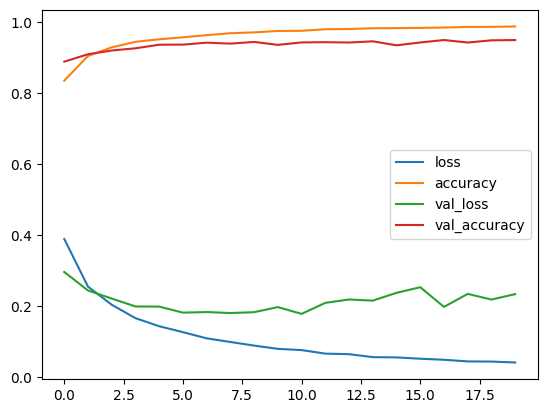

In [60]:
model_loss.plot()

In [61]:
model.evaluate(x_train, y_train)

852/852 [==============================] - 21s 23ms/step - loss: 0.0182 - accuracy: 0.9945


[0.01822713203728199, 0.9944978356361389]

In [62]:
model.evaluate(x_test, y_test)

213/213 [==============================] - 4s 21ms/step - loss: 0.2335 - accuracy: 0.9487


[0.23345500230789185, 0.9486502408981323]

In [63]:
review1 = "it fits me so well"
review = [review1]

In [64]:
tokens = tokenizer.texts_to_sequences(review)

In [65]:
tokens_pad = pad_sequences(tokens, maxlen=maxlen)
tokens_pad.shape

(1, 50)

In [66]:
mod_pred = model.predict(tokens_pad)
mod_pred

1/1 [==============================] - 1s 1s/step


array([[0.98015994]], dtype=float32)

In [67]:
df_pred = pd.DataFrame(mod_pred, index=review)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)

In [68]:
df_pred["Predicted_Feedback"] = df_pred["Pred_Proba"].apply(lambda x: 1 if x>=0.5 else 0)

In [69]:
df_pred

,Pred_Proba,Predicted_Feedback
it fits me so well,0.98016,1
